In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
class KMeans:

    def __init__(self, pts=False, k=1, step_dist=0.001, max_iter=200, make_plot=True):    
        if not pts:
            pts = np.random.randn(10, 2)

        self.k = k
        self.pts = pts
        self.step_dist = step_dist
        self.max_iter = max_iter
        self.make_plot = make_plot
        self.n = len(self.pts[0])
        self.k_centers = []
        # for _ in range(self.k): self.k_centers.append(np.random.randn(self.n))
        self.k_centers = np.random.randn(self.k, self.n)
        self.closest_centroid_index_for_pts = []

    def l2_norm(self, pt1, pt2):
        n1 = len(pt1)
        n2 = len(pt2)
        if n1 == n2:
            total_dist = 0
            for i in range(n1):
                total_dist += (pt1[i] - pt2[i])**2      
            return total_dist**0.5
        else: print(f'Point size mismatch: {n1} != {n2}')

    def calc_centers(self, update=True):
        # current closest center for each point
        this_closest_centroid_index_for_pts = []
        for pt in self.pts:
            dists = []
            for kcenter in self.k_centers:
                dist = self.l2_norm(pt, kcenter)
                dists.append(dist)
            this_closest_centroid_index_for_pts.append(np.argmin(dists))

        if update:
            self.closest_centroid_index_for_pts = this_closest_centroid_index_for_pts

    def step(self):
        # get mean center of every pts in each cluster
        mean_centers_for_each_cluster = []
        for ki in range(self.k):
            pts_in_k = []
            for idx, pt in enumerate(self.pts):
                if ki == self.closest_centroid_index_for_pts[idx]:
                    pts_in_k.append(pt)

            ki_center = np.average(pts_in_k, axis=0)
            print(f'{ki}: {ki_center}')
            mean_centers_for_each_cluster.append(ki_center)

        # move each cluster center towards that by self.step_dist
        for idx, k_center in enumerate(self.k_centers):
            mean_center_at_k = mean_centers_for_each_cluster[idx]
            if len(k_center) == len(mean_center_at_k[0]):
                for dim in range(len(k_center)):
                    if k_center[dim] > mean_center_at_k[dim]: k_center[dim] -= self.step_dist
                    else: k_center[dim] += self.step_dist

            else: print(f'something\'s up with step function: size mismatch')


    def plot(self):
        xs = self.pts[:, 0]
        ys = self.pts[:, 1]

        plt.scatter(xs, ys, label='points')

        xs = self.k_centers[:, 0]
        ys = self.k_centers[:, 0]
        plt.scatter(xs, ys, label='centers')

        plt.legend()

    def train(self):
        self.calc_centers()
        i = self.max_iter
        while i > 0:
            self.step()
            if self.make_plot and i%10: self.plot()
            i-=1

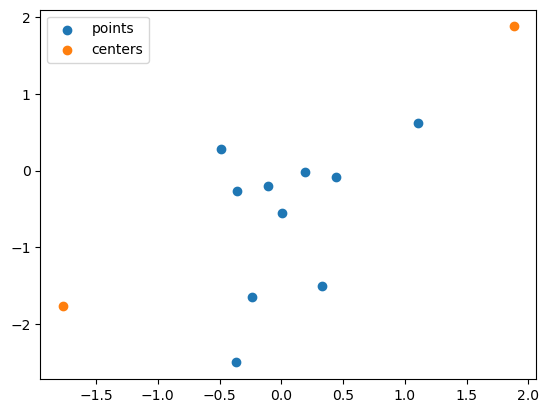

In [167]:
model = KMeans(k=2)
model.plot()

In [168]:
model.train()

0: [ 0.62731681 -0.32253235]
1: [-0.19505722 -0.70019691]


TypeError: object of type 'numpy.float64' has no len()

In [153]:
model.closest_centroid_index_for_pts

[]

In [130]:
for x in model.k_centers:
    print(x)
print()
for y in model.pts:
    print(y)

[-1.05135446 -1.34060867]
[0.56267437 0.71384812]

[-0.95392273  0.56029175]
[1.95035024 1.48778189]
[ 0.30805055 -1.12083099]
[-0.38026142  0.49774712]
[ 1.49880701 -0.32502672]
[ 1.01635373 -0.01363277]
[1.69382596 0.85722819]
[-0.5835772   1.28324725]
[-0.39338966 -0.63229174]
[0.35699457 0.85852314]


In [140]:
x = np.random.randn(10)
print(x)
print(np.argmin(x))

[ 2.11199103  0.00514637  1.47750967  0.77039669  1.99925306  0.26167441
 -0.28140826  1.96618647  0.38846123 -0.11739124]
6


C:\Users\chinm\AppData\Local\Temp\ipykernel_19744\3682269968.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(center[0], center[1], cmap='green')


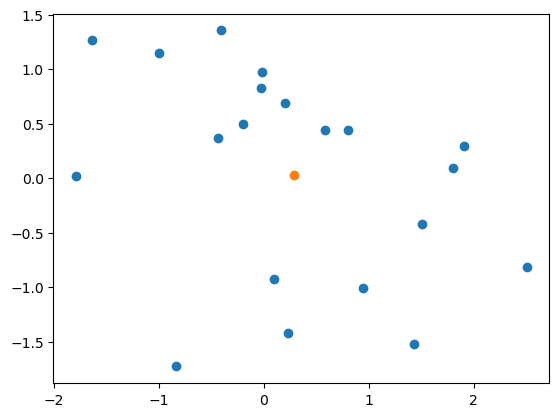

In [42]:
pts = np.random.randn(20, 2)
xs = pts[:, 0]
ys = pts[:, 1]
center = np.average(pts, axis=0)
plt.scatter(xs, ys)
plt.scatter(center[0], center[1], cmap='green')